https://www.kaggle.com/code/kanncaa1/machine-learning-tutorial-for-beginners

## Machine Learning
### Supervised Learning
- EDA(Exploratory Data Analysis)
- K-Nearest Neighbors (KNN)
- Regression
- Cross Validation (CV)
- ROC Curve
- Hyperparameter Tuning
- Pre-procesing Data

### Unsupervised Learning
- Kmeans Clustering
- Evaluation of Clustering
- Standardization
- Hierachy
- T - Distributed Stochastic Neighbor Embedding (T - SNE)
- Principle Component Analysis (PCA)


## Biomechanical features of orthopedic patients
### Classifying patients based on six features
Last Updated: 7 years ago (Version 1)

### About this Dataset

**Context**
- The data have been organized in two different but related classification tasks.

### column_3C_weka.csv (file with three class labels)

- The first task consists in classifying patients as belonging to one out of three categories: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients).

### column_2C_weka.csv (file with two class labels)

- For the second task, the categories Disk Hernia and Spondylolisthesis were merged into a single category labelled as 'abnormal'. Thus, the second task consists in classifying patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 patients).

### Content
**Field Descriptions:**

**Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):**

- pelvic incidence
- pelvic tilt
- lumbar lordosis angle
- sacral slope
- pelvic radius
- grade of spondylolisthesis

### Acknowledgements
The original dataset was downloaded from UCI ML repository:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Files were converted to CSV

### Inspiration
**Use these biomechanical features to classify patients according to their labels**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('column_2C_weka.csv')
print(plt.style.available)  #look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
data1 = data.copy()
data1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


## MACHINE LEARNING (ML)
- In python there are some ML libraries like sklearn, keras or tensorflow. We will use sklearn.

## Supervised learning:
- It uses data that has labels. Example: there are orthopedic patients data that have labels: normal and abnormal.
- There are features (predictor variable) and target variable. Features are like pelvic radius or sacral slope (if you have no idea what these are like me, you can look images in google like what i did:)) Target variables are labels normal and abnormal.
- Aim is that as given features(input) predict whether target variable(output) is normal or abnormal.
- Classification: target variable consists of categories like normal or abnormal.
- Regression: target variable is continious like stock market.
- If these explanations are not enough for you, just google them. However, be careful about terminology: features = predictor variable = independent variable = columns = inputs. target variable = responce variable = class = dependent variable = output = result.

## EXPLORATORY DATA ANALYSIS (EDA)
- I always start with head() to see features that are pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, sacral_slope, pelvic_radius and degree_spondylolisthesis and target variable that is class.
- head(): default value of it shows first 5 rows(samples). If you want to see for example 100 rows just write head(100).


In [4]:
#to see features and target variable
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


### As you can see:

- length: 310 (range index)
- Features are float.
- Target variables are object that is like string.
- Okey we have some ideas about data but lets look go inside data deeper using describe()

In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


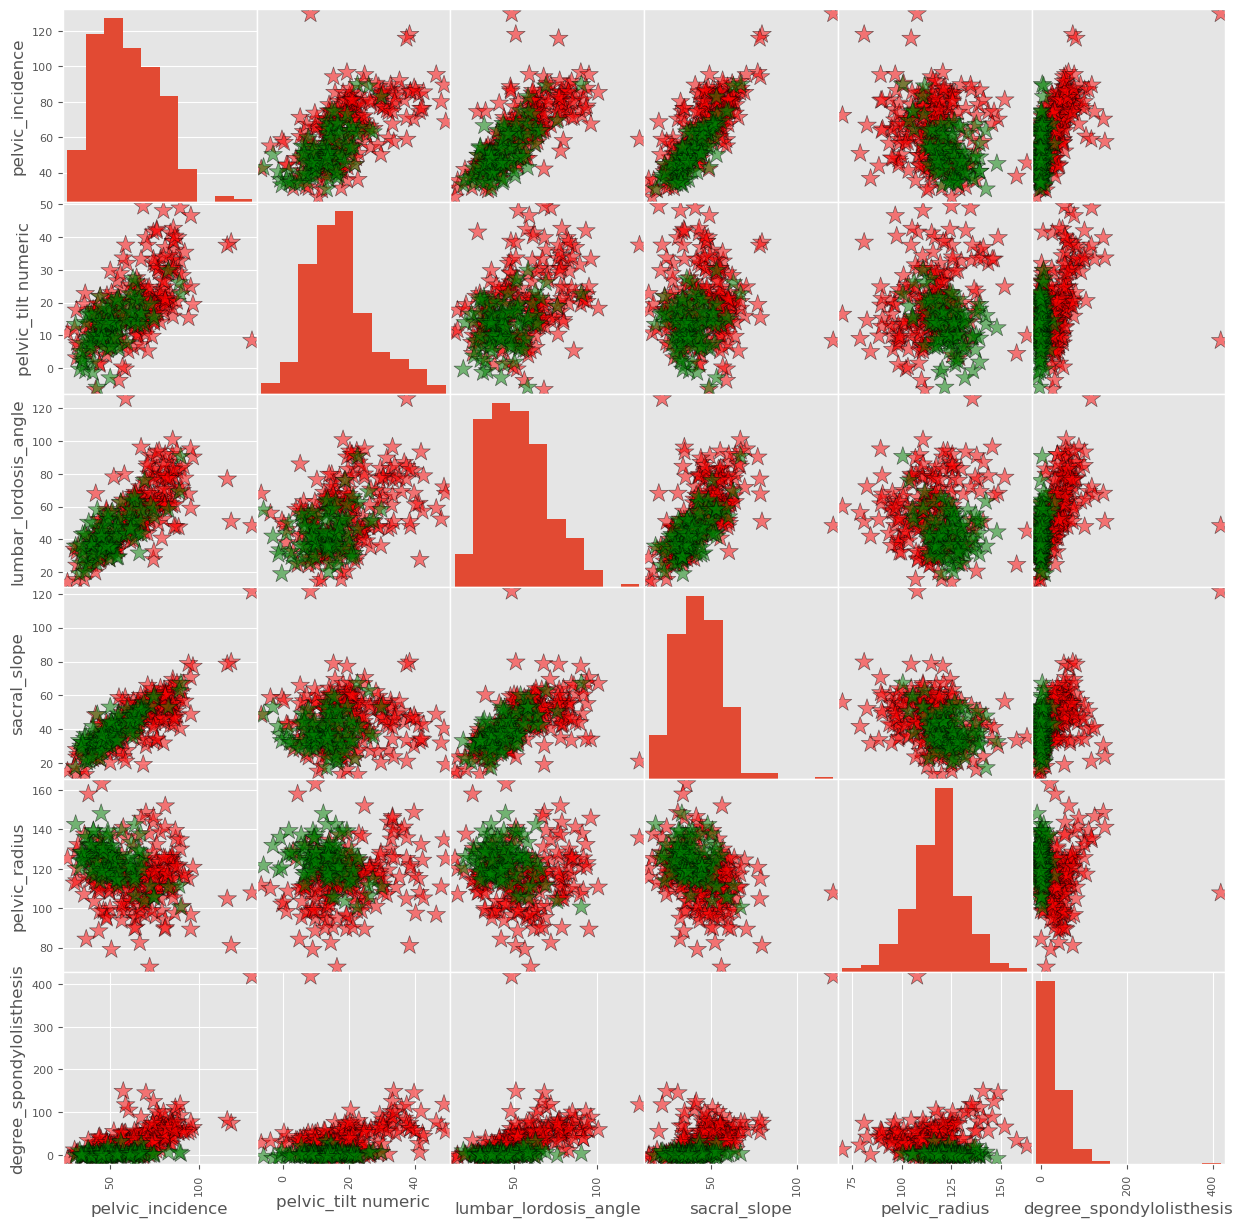

In [7]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                         c=color_list, figsize= [15,15], diagonal='hist',
                         alpha=0.5, s = 200, marker = '*', edgecolor= "black")
plt.show()

<Figure size 1500x1500 with 0 Axes>

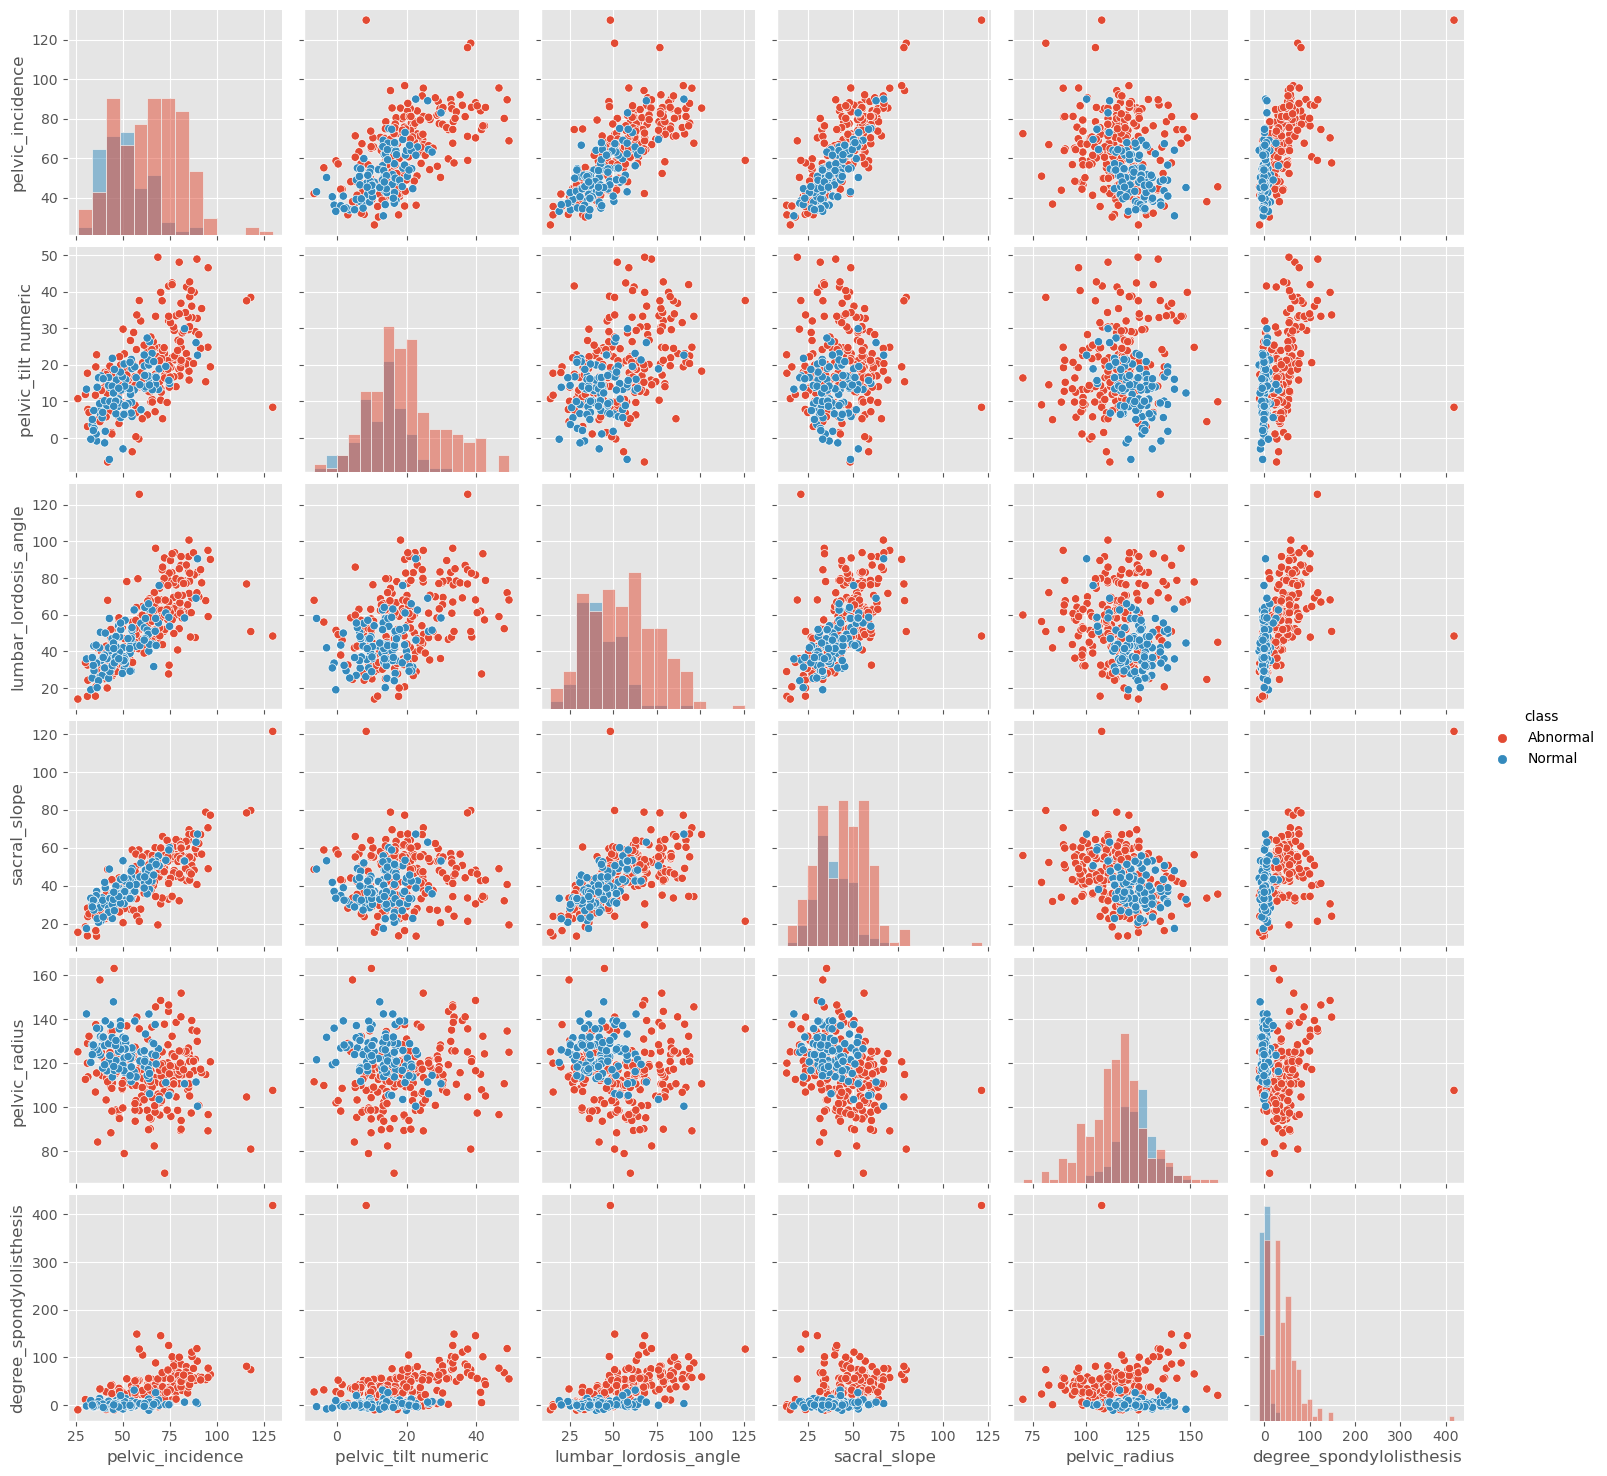

In [8]:
plt.figure(figsize = (15,15))
sns.pairplot(data= data, hue = 'class', diag_kind='hist')
plt.show()

Okay, as you understand in scatter matrix there are relations between each feature but how many normal(green) and abnormal(red) classes are there.

- Searborn library has countplot() that counts number of classes
- Also you can print it with value_counts() method

This data looks like balanced. Actually there is no definiton or numeric value of balanced data but this data is balanced enough for us.
Now lets learn first classification method KNN

class
Abnormal    210
Normal      100
Name: count, dtype: int64

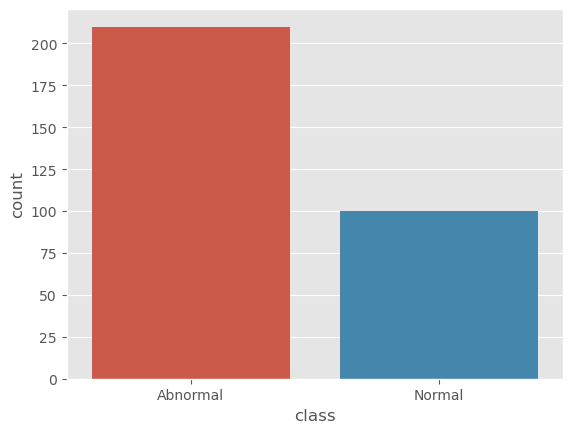

In [9]:
sns.countplot(x = data['class'])
data['class'].value_counts()

## K-NEAREST NEIGHBORS (KNN)
- KNN: Look at the K closest labeled data points
- Classification method.
- First we need to train our data. Train = fit
- fit(): fits the data, train the data.
- predict(): predicts the data
- If you do not understand what is KNN, look at youtube there are videos like 4-5 minutes. You can understand better with it.
- Lets learn how to implement it with sklearn
- x: features
- y: target variables(normal, abnormal)
- n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.drop(['class'], axis = 1), data['class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

- Well, we fit the data and predict it with KNN.
- So, do we predict correct or what is our accuracy or the accuracy is best metric to evaluate our result? Lets give answer of this questions
- Measuring model performance: Accuracy which is fraction of correct predictions is commonly used metric. We will use it know but there is another problem.

- As you see I train data with x (features) and again predict the x(features). Yes you are reading right but yes you are right again it is absurd :)

- Therefore we need to split our data train and test sets.

- train: use train set by fitting
- test: make prediction on test set.
- With train and test sets, fitted data and tested data are completely different
- train_test_split(x,y,test_size = 0.3,random_state = 1)
- x: features
- y: target variables (normal,abnormal)
- test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
- random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
- fit(x_train,y_train): fit on train sets
- score(x_test,y_test)): predict and give accuracy on test sets


In [11]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, 
                                                    random_state = 10)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('With KNN (K = 3), accuracy is: ', knn.score(x_test, y_test))

With KNN (K = 3), accuracy is:  0.8817204301075269


**Accuracy is 88% so is it good?** I do not know actually, we will see at the end of tutorial.
Now the question is why we choose K = 3 or what value we need to choose K. The answer is in model complexity.

### Model complexity:

- K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performace.
- Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
- If k is big, model that is less complex model can lead to underfit.
- At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 5(best testing performance), accuracy has highest value almost 88%.

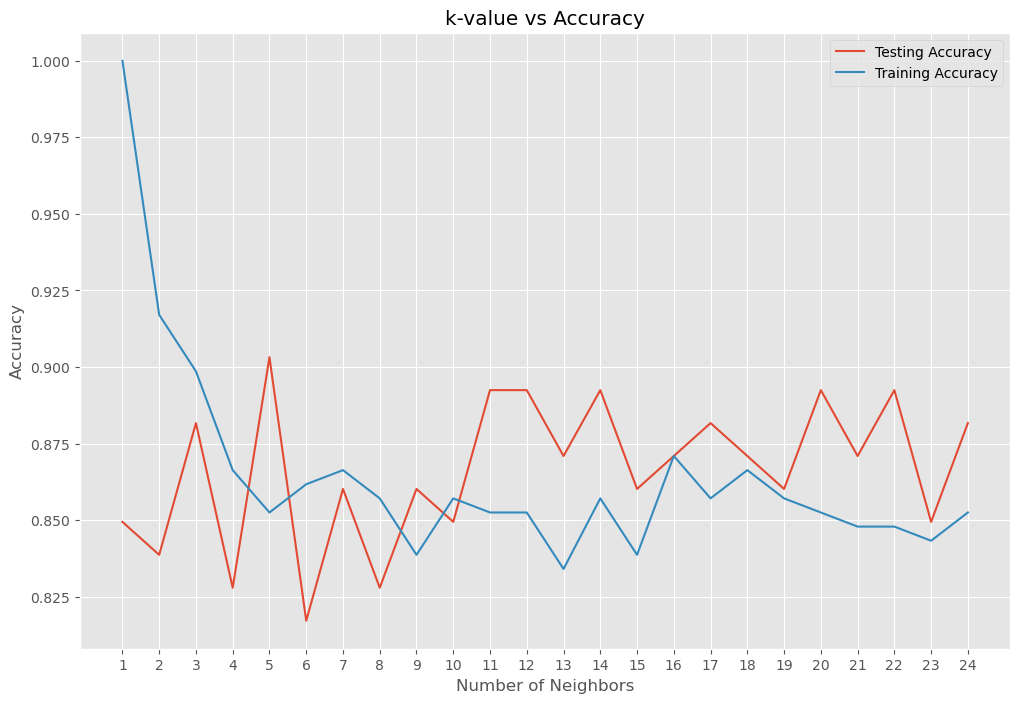

Best accuracy is 0.9032258064516129 with k = 5


In [12]:
#model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
#loop over dfferent values of k
for i, k in enumerate(neig):
    #k from 1 to 25 (exclude)
    knn = KNeighborsClassifier(n_neighbors = k)
    #fit with knn
    knn.fit(x_train, y_train)
    #training and testing accracy for each k
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
    
#Plot
plt.figure(figsize = (12, 8))
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k-value vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print('Best accuracy is {} with k = {}'.format(np.max(test_accuracy), 
                         1+ test_accuracy.index(np.max(test_accuracy))))

### Up to this point what you learn:¶
- Supervised learning
- Exploratory data analysis
- KNN
- How to split data
- How to fit, predict data
- How to measure medel performance (accuracy)
- How to choose hyperparameter (K)

### What happens if I chance the title KNN and make it some other classification technique like Random Forest?

- The answer is nothing. What you need to is just watch a video about what is random forest in youtube and implement what you learn in KNN. Because the idea and even most of the codes (only KNeighborsClassifier need to be RandomForestClassifier ) are same. You need to split, fit, predict your data and measue performance and choose hyperparameter of random forest(like max_depth, min_samples_split, criterion etc.)

## REGRESSION¶
- Supervised learning
- We will learn linear and logistic regressions
- This orthopedic patients data is not proper for regression so I only use two features that are sacral_slope and pelvic_incidence of abnormal
- I consider feature is pelvic_incidence and target is sacral_slope
- Lets look at scatter plot so as to understand it better
- reshape(-1,1): If you do not use it shape of x or y becomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1)

In [13]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


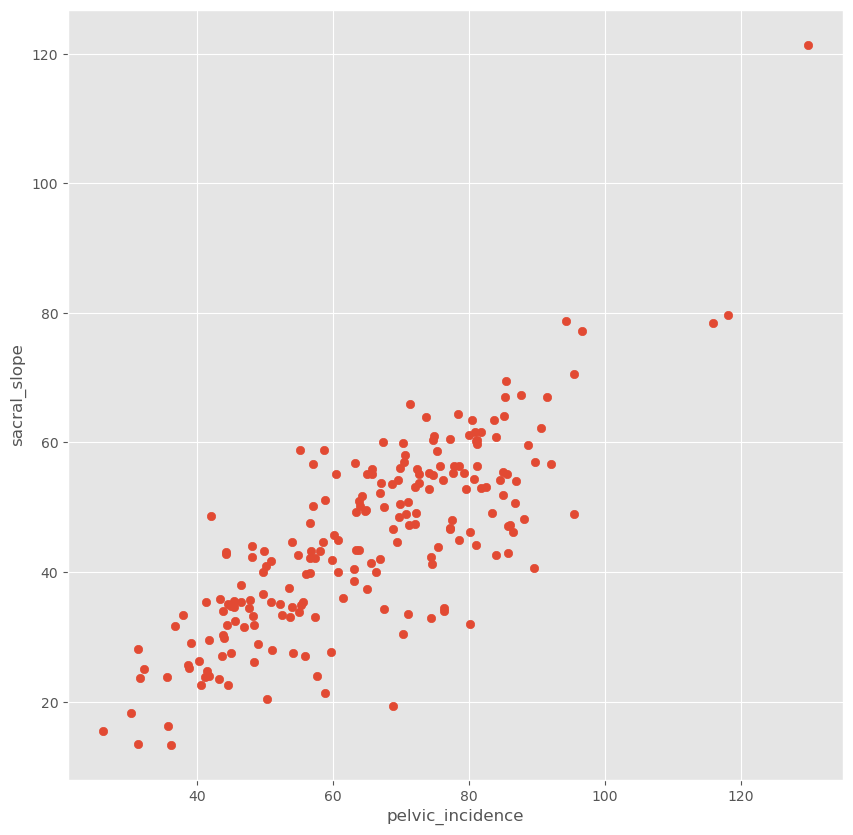

In [14]:
#create data2 that includes pelvic_incidence that is feature and sacral_slope 
#that is target variable for ABNORMAL only
data2 = data[data['class'] == 'Abnormal']
x = np.array(data2.loc[:, 'pelvic_incidence']).reshape(-1,1)
y = np.array(data2.loc[:, 'sacral_slope']).reshape(-1,1)
#Scatter
plt.figure(figsize = (10,10))
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

Now we have our data to make regression. In regression problems target value is continuously varying variable such as price of house or sacral_slope. Let's fit into these points.
**Linear Regression**
- y = ax + b where y = target, x = feature and a = parameter of model.
- We choose parameter of model (a) according to minimum error function that is lost function 
- In linear regression we use Ordinary Least Square (OLS) as lost function.
- OLS: sum all residuals but some positive and negative residuals can cancel each other so we take sum of square of residuals. It is called OLS method.
- Score: It uses R^2 method that is ((y_pred - y_mean)^2) / (y_actual - y_mean)^2

R^2 score =  0.6458410481075871


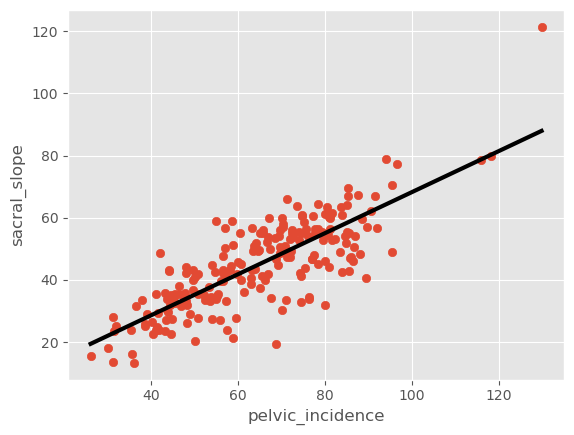

In [15]:
#LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
#Fit
reg.fit(x,y)
#predict
predicted = reg.predict(predict_space)
#R^2
print('R^2 score = ', reg.score(x, y))
#plot regression line and scatter
plt.plot(predict_space, predicted, color = 'black', linewidth = 3)
plt.scatter(x= x, y= y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [16]:
#DK WHAT
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y , test_size = 0.3, 
                                                    random_state = 10)
reg.fit(x_train1, y_train1)
prediction = reg.predict(x_test1)
print('With Linear Regression, accuracy is: ', reg.score(x_test1, y_test1))


With Linear Regression, accuracy is:  0.7350939104801991


## CROSS VALIDATION
As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
**Cross Validation (CV)**
- K folds = K fold CV.
- When K is increased, computationally cost increases
- cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)

In [17]:
#CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x, y, cv = k)
print('CV Scores: ', cv_result)
print('CV scores average: ', np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average:  0.39314625028848676


## Regularized Regression¶
As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.

### Ridge regression: First regularization technique. Also it is called L2 regularization.
- Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
- alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
- What if alpha is zero? lost function = OLS so that is linear rigression :)
- If alpha is small that can cause overfitting
- If alpha is big that can cause underfitting. But do not ask what is small and big. These can be change from problem to problem.

### Lasso regression: Second regularization technique. Also it is called L1 regularization.
- Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
- It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
- In order to choose feature, I add new features in our regression data



In [18]:
#Ridge
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 12, 
                                                    test_size = 0.3)
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
print('Ridge score: ', ridge.score(x_test, y_test))

Ridge score:  0.6375064486096828


In [19]:
#Lasso
from sklearn.linear_model import Lasso
x = np.array(data2.loc[:, ['pelvic_incidence', 'pelvic_tilt numeric', 
                           'lumbar_lordosis_angle', 'pelvic_radius']])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5, 
                                                    test_size = 0.3)
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
print('Lasso score: ', lasso.score(x_test, y_test))
print('Lasso coefficient: ', lasso.coef_)


Lasso score:  0.9999983620778207
Lasso coefficient:  [ 0.99899681 -0.99808108  0.         -0.        ]


**As you can see pelvic_incidence and pelvic_tilt numeric are important features but others are not important**

**Now lets discuss accuracy. Is it enough for measurement of model selection. For example, there is a data that includes 95% normal and 5% abnormal samples and our model uses accuracy for measurement metric. Then our model predict 100% normal for all samples and accuracy is 95% but it classify all abnormal samples wrong. Therefore we need to use confusion matrix as a model measurement matrix in case of imbalanced data.**

**While using confusion matrix lets use Random forest classifier to diversify classification methods.**

- tp = Prediction is positive(normal) and actual is positive(normal).
- fp = Prediction is positive(normal) and actual is negative(abnormal).
- fn = Prediction is negative(abnormal) and actual is positive(normal).
- tn = Prediction is negative(abnormal) and actual is negative(abnormal)
- precision = tp / (tp+fp)
- recall = tp / (tp+fn)
- f1 = 2 precision recall / ( precision + recall)

In [20]:
#Confusion matrix with RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:, data.columns != 'class'], data.loc[:, 'class']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 30, 
                                                    test_size = 0.3)
rf = RandomForestClassifier(random_state = 22)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
print('Classification Report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[60  4]
 [11 18]]
Classification Report: 
               precision    recall  f1-score   support

    Abnormal       0.85      0.94      0.89        64
      Normal       0.82      0.62      0.71        29

    accuracy                           0.84        93
   macro avg       0.83      0.78      0.80        93
weighted avg       0.84      0.84      0.83        93



**tp = true positive(18), fp = false positive(11), fn = false negative(4), tn = true negative(60)**

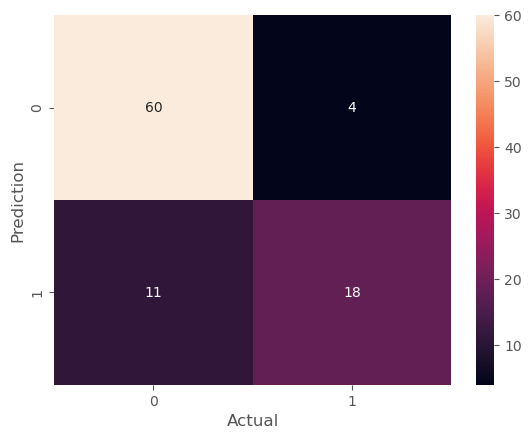

In [21]:
#visualize with seaborn library
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

### ROC Curve with Logistic Regression
- logistic regression output is probabilities
- If probability is higher than 0.5 data is labeled 1(abnormal) else 0(normal)
- By default logistic regression threshold is 0.5
- ROC is receiver operating characteristic. In this curve x axis is false positive rate and y axis is true positive rate
- If the curve in plot is closer to left-top corner, test is more accurate.
- Roc curve score is auc that is computation area under the curve from prediction scores
- We want auc closer to 1
- fpr = False Positive Rate
- tpr = True Positive Rate
- If you want, I made ROC, Random forest and K fold CV in this tutorial. https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv/

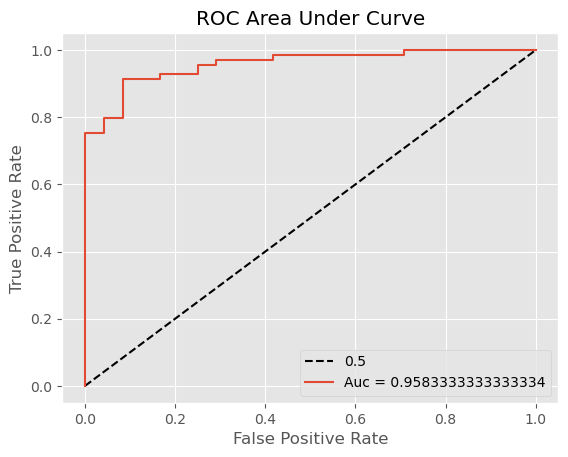

In [22]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1, normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:, 'class']]
x, y = data.loc[:, (data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:, 'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[: , 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)
#Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Area Under Curve')
plt.legend(['0.5', 'Auc = {}'.format(auc_roc)])
plt.show()

#print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_prob))
#print('Classification Report\n', classification_report(y_test, y_pred_prob))

### HYPERPARAMETER TUNING
**As I mention at KNN there are hyperparameters that are need to be tuned**

**For example:**
- k at KNN
- alpha at Ridge and Lasso
- Random forest parameters like max_depth, min_samples_split
- linear regression parameters(coefficients)

**Hyperparameter Tuning:**
- try all of combinations of different parameters
- fit all of them
- measure prediction performance
- see how well each performs
- finally choose best hyperparameters

**We only need is one line code that is GridSearchCV**
- grid: K is from 1 to 50(exclude)
- GridSearchCV takes knn and grid_dict and makes grid search. It means combination of all hyperparameters. Here it is k.

In [23]:
#grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid_dict = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid_dict, cv = 3)
knn_cv.fit(x, y)

#Print Hyperparameter
print('Tuned hyperparameter k = ', knn_cv.best_params_)
print('Best score = ', knn_cv.best_score_)

Tuned hyperparameter k =  {'n_neighbors': 4}
Best score =  0.7559434901667911


**Other grid search example with 2 hyperparameter**

- First hyperparameter is C:logistic regression regularization parameter
>If C is high: overfit  &  If C is low: underfit
- Second hyperparameter is penalty(lost function): l1 (Lasso) or l2(Ridge) as we learnt at linear regression part.

In [24]:
#grid search cross validation with 2 hyperparameters
# 1. hyperparameter is C: logistic regression regularization parameter
# 2. penalty L1 or L2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3 , 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 3)
logreg_cv.fit(x_train, y_train)

#printing optimal parameters and best score
print('Tuned hyperparameter: ', logreg_cv.best_params_)
print('Best score = ', logreg_cv.best_score_)

Tuned hyperparameter:  {'C': 0.001, 'penalty': 'l2'}
Best score =  0.8572425164890919


## PRE-PROCESSING DATA
- In real life data can include objects or categorical data in order to use them in sklearn we need to encode them into numerical data
- In data, class is abnormal and normal. Lets convert them into numeric value (actually I did it in logistic regression part with different method)
- 2 different feature is created with the name class_Abnormal and class_Normal
- However we need to drop one of the column because they are duplicated

In [25]:
data1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [26]:
df = pd.get_dummies(data1, dtype = int)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [27]:
#drop one of the features: class_Abnormal or class_Normal
df.drop('class_Normal', axis = 1, inplace = True)  
#or we could have used drop_first = True in pd.get_dummies function
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### Other preprocessing step is centering, scaling or normalizing

- you have noticed that KNN uses form of distance for classificaiton like some oher methods. Therefore, we need to scale data. For this reason, we use standardization: ( x - x.mean) / x.variance or x - x.min / x.range
- pipeline: The purpose of the pipeline is to assemble several steps like svm(classifier) and standardization(pre-processing)
- How we create parameters name: for example SVM__C : stepName__parameterName 
- Then grid search to find best parameters

In [32]:
#SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C': [1,10,100], 'SVM__gamma': [0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 1)
svm_cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)
svm_cv.fit(x_train, y_train)
y_pred = svm_cv.predict(x_test)

print("Accuracy: {}".format(svm_cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(svm_cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


## Unsupervised Learning
- Unsupervised learning: It uses data that has unlabeled target variable and uncovers hidden patterns from unlabeled data. Example, there are orthopedic patients data that do not have labels. Example: there are orthopedic patient data that does not have labels. You do not know which patient is normal or abnormal.
- As you know orthopedic patients data is labeled (supervised) data. It has target variables. In order to work on unsupervised learning, lets drop target variables and to visualize just consider pelvic_radius and degree_spondylolisthesis.

## KMEANS
- Lets try our first unsupervised method that is KMeans Cluster
- KMeans Cluster: The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity
- KMeans(n_clusters = 2): n_clusters = 2 means that create 2 cluster

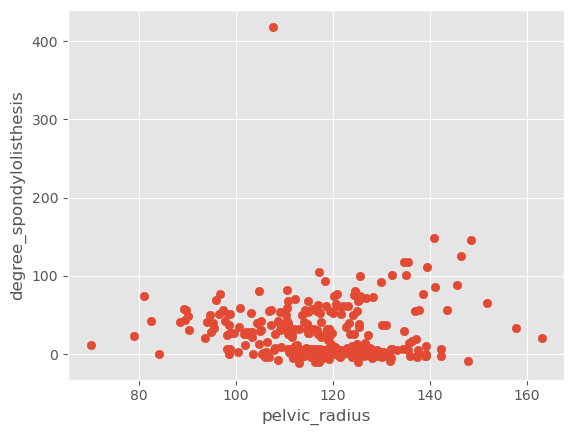

In [33]:
# as you can see there is no labels in data
plt.scatter(df['pelvic_radius'], df['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

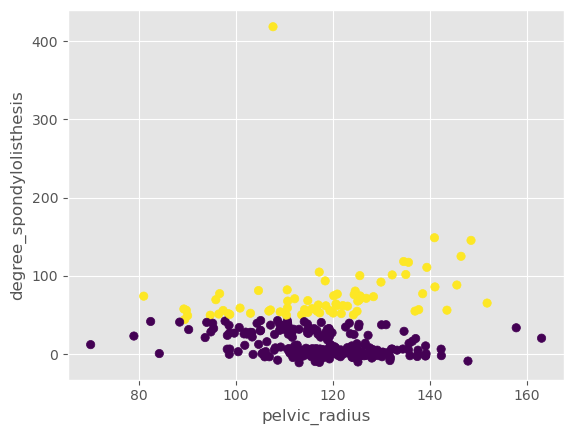

In [34]:
# KMeans Clustering
data2 = data1.loc[:, ['degree_spondylolisthesis', 'pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data2['pelvic_radius'], data2['degree_spondylolisthesis'], c = labels)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

## EVALUATION OF CLUSTERING
We cluster data in two groups. Okey well is that correct clustering? In order to evaluate clustering we will use cross tabulation table.
- There are two clusters that are 0 and 1
- First class 0 includes 138 abnormal and 100 normal patients
- Second class 1 includes 72 abnormal and 0 normal patients. The majority of two clusters are abnormal patients.

In [37]:
# cross tabulation table
class_df = pd.DataFrame({'labels': labels, 'class': data['class']})
ct = pd.crosstab(class_df['labels'], class_df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


The new question is that we know how many class data includes, but what if number of class is unknown in data. This is kind of like hyperparameter in KNN or regressions.
- inertia: how spread out the clusters are distance from each sample
- lower inertia means more clusters
- What is the best number of clusters? There are low inertia and not too many cluster trade off so we can choose elbow

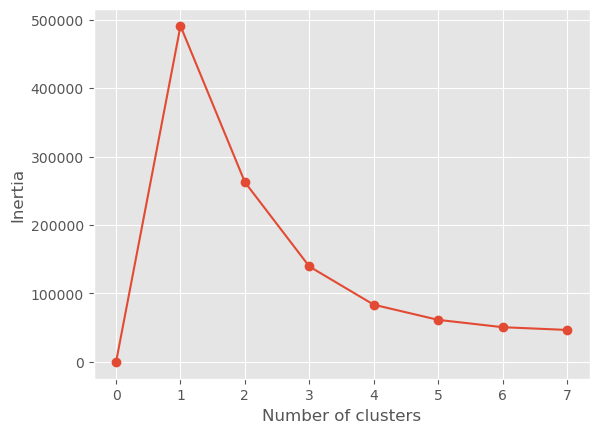

In [38]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8), inertia_list, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## STANDARDIZATION
- Standardization is important for both supervised and unsupervised learning
- Do not forget standardization as pre-processing.
- As we already have visualized data so you get the idea. Now we can use all features for clustering.
- We can use pipeline like supervised learning.

In [39]:
data_new = pd.read_csv('column_2C_weka.csv')
ds  = data_new.drop('class', axis = 1)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scaler, kmeans)
pipe.fit(ds)
labels = pipe.predict(ds)
df2 = pd.DataFrame({'labels': labels, 'class': data['class']})
ct1 = pd.crosstab(df2['labels'], df2['class'])
print(ct1)

class   Abnormal  Normal
labels                  
0             97      90
1            113      10


## HIERACHY
- vertical lines are clusters
- height on dendrogram: distance between merging cluster
- method= 'single' : closest points of clusters

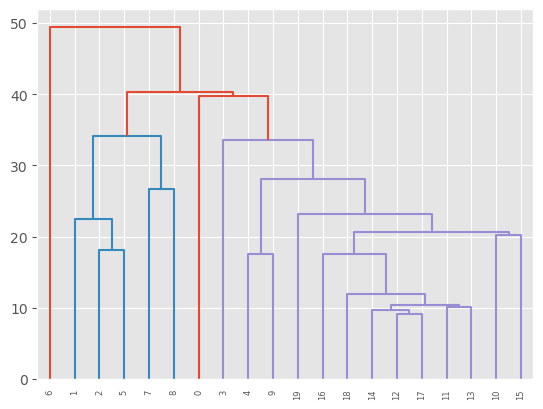

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(ds.iloc[200:220, :], method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

## T- Distributed Stochastic Neighbor Embedding (T-SNE)
- learning rate: 50-200 in normal
- fit_transform: it is both fit and transform. t-sne only has fit_transform
- Varieties have same position relative to one another

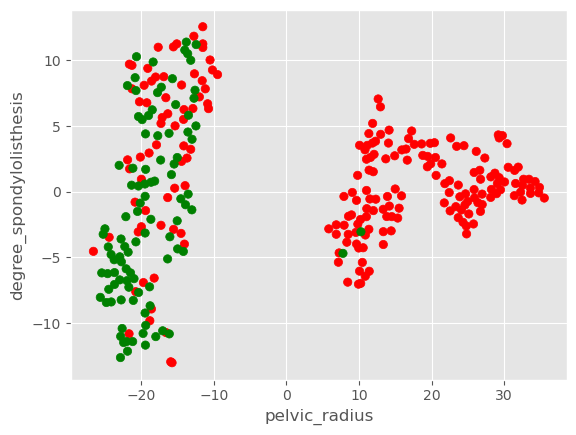

In [45]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)
transformed = model.fit_transform(data2)
x = transformed[:, 0]
y = transformed[:, 1]
plt.scatter(x, y, c = color_list)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

## PRINCIPLE COMPONENT ANALYSIS (PCA)¶
- Fundemental dimension reduction technique
- first step is decorrelation:
- rotates data samples to be aligned with axes
- shifts data samples so they have mean zero
- no information lost
- fit() : learn how to shift samples
- transform(): apply the learned transformation. It can also be applied to test data
- Resulting PCA features are not linearly correlated
- Principle components: directions of variance

In [46]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(ds)
transformed = model.transform(ds)
print('Principle components: \n', model.components_)

Principle components: 
 [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08927296e-11 -5.77350269e-01
  -3.59075138e-12  3.06727015e-12]]


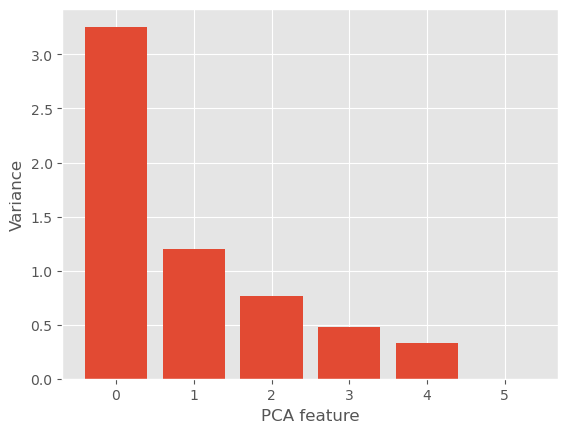

In [47]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(ds)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.show()

- Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
- PCA identifies intrinsic dimension when samples have any number of features
- intrinsic dimension = number of PCA feature with significant variance
- In order to choose intrinsic dimension try all of them and find best accuracy
- Also check intuitive way of PCA with this example: https://www.kaggle.com/kanncaa1/tutorial-pca-intuition-and-image-completion

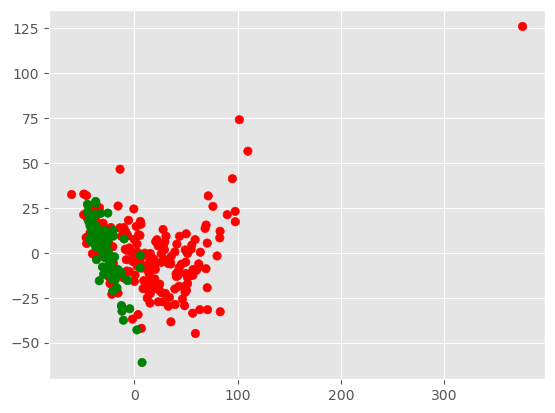

In [48]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(ds)
transformed = pca.transform(ds)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()